
# Student Name - Mohd Amaan


## Importing neccessary libraries and data

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel('koalas_dataset.xlsx')
df.head()

,koala_id,region,habitat,gender,age_in_years,Paw Size,total lengh,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
0,1,1,VIC,m,8.0,16.0,77.0,19.1,19.5,24.5,15.4,2.2,63.0,61.0
1,2,1,VIC,f,6.0,16.5,79.5,17.5,16.2,22.5,12.6,3.0,63.5,58.0
2,3,1,VIC,f,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0
3,4,1,VIC,f,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0
4,5,1,VIC,f,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0


In [8]:
# Shape of the dataset
df.shape

(104, 14)

In [9]:
# We drop the koala_id column as it is not useful for the analysis
df = df.drop('koala_id', axis=1)
# Describe the dataset
df.describe()

,region,age_in_years,Paw Size,total lengh,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,102.000000,103.000000,104.000000,104.000000,103.000000
mean,3.625000,3.833333,17.009615,75.088462,18.554808,22.650000,18.461765,12.917476,5.886538,62.000000,57.582524
std,2.349086,1.909244,1.959518,4.310549,9.761017,87.562416,4.416935,11.160491,39.082636,2.045597,2.775150
min,1.000000,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,1.000000,2.250000,15.875000,72.000000,15.700000,9.875000,14.550000,9.950000,1.400000,60.500000,56.000000
50%,3.000000,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,6.000000,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.250000
max,7.000000,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


## Cleaning the dataset

In [11]:
# Check for missing values
df.isna().sum()

region                 0
habitat                0
gender                 0
age_in_years           2
Paw Size               0
total lengh            0
head_length            0
ear_size               0
foot_length            2
skull_width            1
eye_diameter           0
chest_circumference    0
belly_circumference    1
dtype: int64

In [12]:
# Droppping the missing values
df.dropna(inplace=True)
df.isna().sum()

region                 0
habitat                0
gender                 0
age_in_years           0
Paw Size               0
total lengh            0
head_length            0
ear_size               0
foot_length            0
skull_width            0
eye_diameter           0
chest_circumference    0
belly_circumference    0
dtype: int64

### Numerical data exploration

<Axes: >

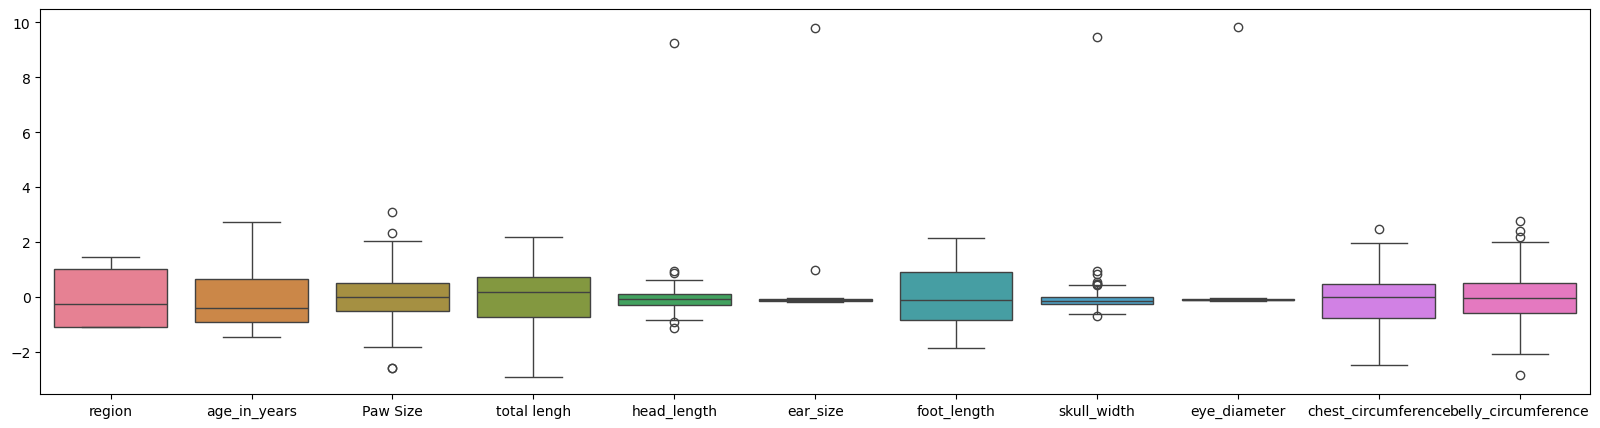

In [14]:
# Check for outliers, we normalized the data to match the range for each column
plt.figure(figsize=(20, 5))
ss = StandardScaler()
df_scaled = ss.fit_transform(df.drop(['habitat','gender'],axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(['habitat','gender'],axis=1).columns)
sns.boxplot(data=df_scaled)

In [15]:
# Multiple columns have outliers, we will remove them
outlier_cols = ['Paw Size', 'head_length', 'ear_size', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']

for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]


<Axes: >

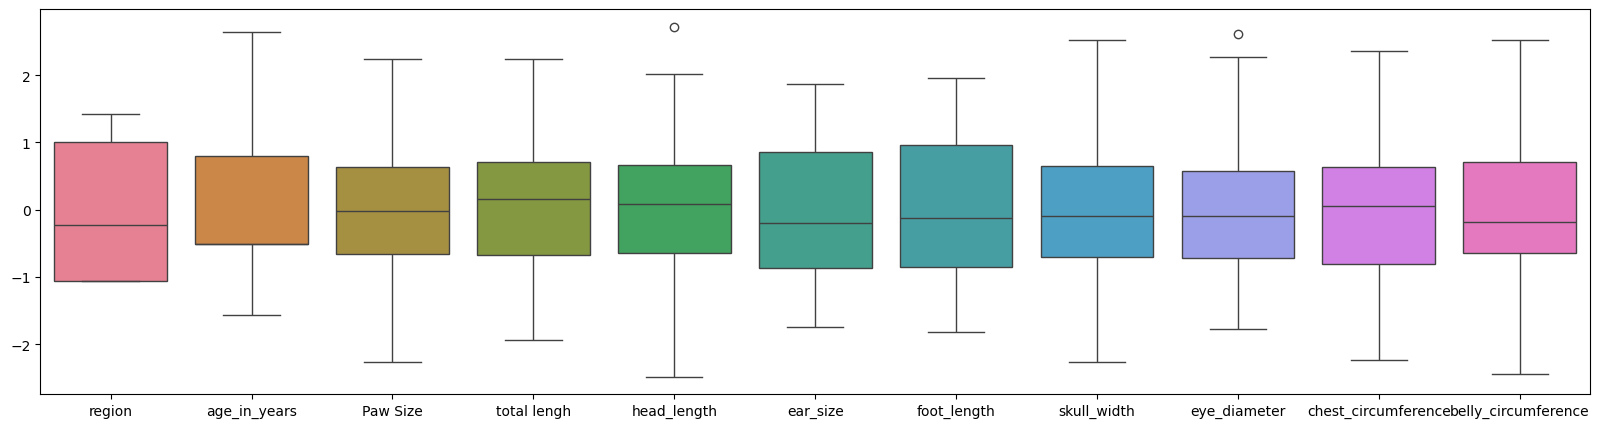

In [16]:
# After removing the outliers
plt.figure(figsize=(20, 5))
ss = StandardScaler()
df_scaled = ss.fit_transform(df.drop(['habitat','gender'],axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(['habitat','gender'],axis=1).columns)
sns.boxplot(data=df_scaled)

### Categorical data exploration

In [18]:
cat_cols = ['habitat','gender']

# Check the unique values in the categorical columns
for col in cat_cols:
    print(df[col].unique())

['VIC' 'VICtoria' 'QLD' 'Queensland' 'Queenstown' 'qld' 'q']
['m' 'f']


In [19]:
# We need to fix values in habitat column
df['habitat'].replace({'VICtoria':'VIC','Queensland':'QLD','Queenstown':'QLD','qld':'QLD','q':'QLD'},inplace=True)

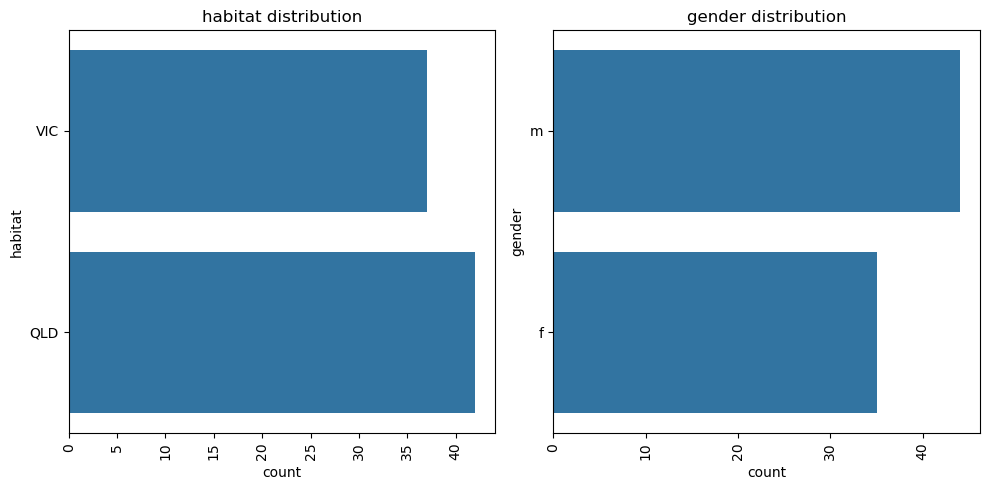

In [20]:
# Plotting the distribution of the categorical columns
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(df[col])
    plt.title(f'{col} distribution')
    plt.xticks(rotation=90)
    plt.tight_layout()

We can see that QLD has more number of Koalas and among all the Koalas, the count of Males is greater than Females

# Data Visualisation

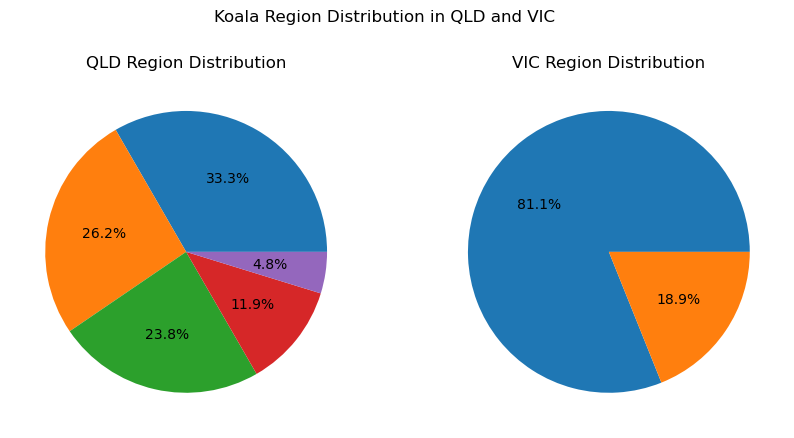

In [23]:
QLD = df[df['habitat'] == 'QLD']['region'].value_counts()
VIC = df[df['habitat'] == 'VIC']['region'].value_counts()

# Plotting the distribution of the regions in both the states
plt.figure(figsize=(10, 5))
plt.suptitle('Koala Region Distribution in QLD and VIC')
plt.subplot(1, 2, 1)
plt.pie(QLD, autopct='%1.1f%%');
plt.title('QLD Region Distribution')
plt.subplot(1, 2, 2)
plt.pie(VIC, autopct='%1.1f%%');
plt.title('VIC Region Distribution');

We can see the QLD has 5 regions with 3 major regions and 2 minor ones whereas VIC only has 2 regions with 1 region nearly containing all the koalas.

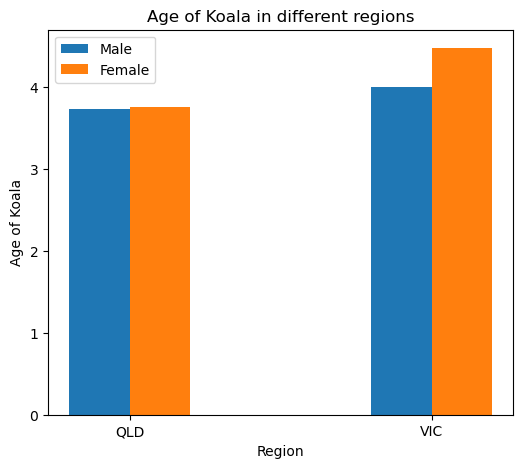

In [25]:
group = df.groupby(['habitat','gender'])

# Plotting the groupby results
plt.figure(figsize=(6, 5))


X = ['QLD','VIC'] 
YQLD = [group['age_in_years'].mean()['QLD']['m'], group['age_in_years'].mean()['VIC']['m']]
YVIC = [group['age_in_years'].mean()['QLD']['f'], group['age_in_years'].mean()['VIC']['f']] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.1, YQLD, 0.2, label = 'Male') 
plt.bar(X_axis + 0.1, YVIC, 0.2, label = 'Female') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Age of Koala") 
plt.title("Age of Koala in different regions") 
plt.legend() 
plt.show() 


We can see that in QLD region, the mean age of Males are bit higher than Females whereas in VIC, the mean age of Males is noticeably lower than those of Females. 

# Analysis

### 1. Is the mean head length of the Koalas significantly different from 92.0 mm?

$$H_0 : \mu = 92$$
$$H_a : \mu \ne 92$$

In [29]:
# Perfeoming the t-test
stats.ttest_1samp(df['head_length'], 9.2)

TtestResult(statistic=27.462594355961325, pvalue=7.555112849260176e-42, df=78)

As $p-value < 0.01$, we reject the $H_0$ and can say that mean head length of koalas is significantly different from 92

### 2. Do male and female Koalas have significantly different mean head lengths?
$$H_0:\mu_a=\mu_b$$
$$H_a:\mu_a\ne\mu_b$$

In [32]:
male = df[df['gender'] == 'm']['head_length']
female = df[df['gender'] == 'f']['head_length']
stats.ttest_ind(male,female)

TtestResult(statistic=1.3071344424391456, pvalue=0.19505710031471268, df=77.0)

As $p-value > 0.1$, we cannot reject the $H_0$ and have no significant prove that male and female koalas have different mean head lengths.

### 3. Can we predict the total length of a Koala based on its head length?

Let's state the Hypothesis first
$$H_0:\beta_1=0$$
$$H_a:\beta_1\ne0$$

In [36]:
model = sm.OLS(df['total lengh'], df['head_length'])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:            total lengh   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              4597.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                    4.26e-71
Time:                        02:38:06   Log-Likelihood:                         -292.05
No. Observations:                  79   AIC:                                      586.1
Df Residuals:                      78   BIC:                                      588.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

We can see that $p-value \sim 0$, so we reject the $H_0$ and can say that we have enough evidence that head length can be used to predict the total lenght of the Koala

### 4. Can we predict the total length of a Koala based on multiple factors such as head length, skull width, and foot length?

Let's state the Hypothesis first
$$H_0:\beta_1=0$$
$$H_a:\beta_1\ne0$$

In [39]:
cols = ['head_length','skull_width','foot_length']
model = sm.OLS(df['total lengh'], df[cols])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:            total lengh   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1777.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                    2.89e-70
Time:                        02:38:06   Log-Likelihood:                         -285.27
No. Observations:                  79   AIC:                                      576.5
Df Residuals:                      76   BIC:                                      583.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

We can see that $p-value \sim 0$, so we reject the $H_0$ and can say that we have enough evidence that head length, skull width and foot length together can be used to predict the total lenght of the Koala. It is better than only using head length as we can see a bit of increase in the $R^2 score$

### 5. Do environmental factors such as state affect Koala’s physical characteristics?

Let's run multiple T-tests on physical characterstics within multiple states
$$H_0:\mu_a=\mu_b$$
$$H_a:\mu_a\ne\mu_b$$

In [43]:
group = df.groupby('habitat')
cols = ['Paw Size', 'total lengh', 'head_length', 'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']

for i in cols:
    QLD = group.get_group('QLD')[i]
    VIC = group.get_group('VIC')[i]
    T,p = stats.ttest_ind(QLD,VIC)
    print("T-test for",i,":",stats.ttest_ind(QLD,VIC))
    if p < 0.05:
        print("Reject Null Hypothesis, i.e. there is a significant difference between QLD and VIC")
    else:
        print("Fail to Reject Null Hypothesis, i.e. there is no significant difference between QLD and VIC")

T-test for Paw Size : TtestResult(statistic=5.317649827549008, pvalue=9.973299920244544e-07, df=77.0)
Reject Null Hypothesis, i.e. there is a significant difference between QLD and VIC
T-test for total lengh : TtestResult(statistic=-2.62918810305781, pvalue=0.010329277265653624, df=77.0)
Reject Null Hypothesis, i.e. there is a significant difference between QLD and VIC
T-test for head_length : TtestResult(statistic=-2.2062007770446312, pvalue=0.030351273219181307, df=77.0)
Reject Null Hypothesis, i.e. there is a significant difference between QLD and VIC
T-test for ear_size : TtestResult(statistic=-21.215897376744103, pvalue=6.717354787227493e-34, df=77.0)
Reject Null Hypothesis, i.e. there is a significant difference between QLD and VIC
T-test for foot_length : TtestResult(statistic=-17.571002662801583, pvalue=1.1529670836191695e-28, df=77.0)
Reject Null Hypothesis, i.e. there is a significant difference between QLD and VIC
T-test for skull_width : TtestResult(statistic=-0.93458693937

### 6. What factors are correlated with the total length of a Koala?

In [45]:
df.drop(['habitat','gender'],axis=1).corr()[['total lengh']].sort_values(by='total lengh',ascending=False)

,total lengh
total lengh,1.000000
head_length,0.593144
skull_width,0.541651
chest_circumference,0.497431
foot_length,0.453133
Paw Size,0.388554
belly_circumference,0.346614
age_in_years,0.294071
ear_size,0.291183
eye_diameter,0.202757


We can see that the correlation of each feature with Total Length in descending order, with top 3 features being Head Length, Skull Width and Chest Circumference